In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Realización de prueba y modelado para la base de datos: **Regresión logistica**


## Iniciamos extrayendo la base de datos

In [174]:
file_path = "../Bases/base_cvs/baseCVsIngVar.csv"  # Ajusta el path si es necesario
df = pd.read_csv(file_path)
df = df.drop(columns=["Unnamed: 0", "Fuente principal"], errors="ignore")  # errors="ignore" evita fallos si ya no existe


In [175]:
df

,Páginas,professional_profile,education,work_experience,skills,certifications,achievements,languages,projects,training_courses,...,tiene_perfil,tiene_educacion,tiene_certificaciones,tiene_proyectos,tiene_links_relevantes,tiene_skills,tiene_achievements,tiene_languages,tiene_projects,secciones_completas
0,2,39,28,72,98,69,0,0,13,48,...,1,1,1,1,0,1,0,0,1,7
1,6,306,369,80,0,57,9,4,182,389,...,1,1,1,1,0,0,1,1,1,8
2,1,26,56,10,99,0,0,65,0,23,...,1,1,0,0,0,1,0,1,0,6
3,1,71,14,80,28,0,0,2,0,0,...,1,1,0,0,1,1,0,1,0,6
4,4,70,79,0,4,0,0,229,0,123,...,1,1,0,0,0,1,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,6,30,50,7,0,0,18,56,395,367,...,1,1,0,1,1,0,1,1,1,8
618,10,126,329,36,24,928,130,0,409,279,...,1,1,1,1,0,1,1,0,1,8
619,3,12,15,82,23,0,228,16,34,27,...,1,1,0,1,0,1,1,1,1,8
620,1,20,22,33,19,0,0,30,0,14,...,1,1,0,0,0,1,0,1,0,6


### Información descriptiva

In [176]:
print(df.info())
print(df["Passed"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 52 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Páginas                                           622 non-null    int64  
 1   professional_profile                              622 non-null    int64  
 2   education                                         622 non-null    int64  
 3   work_experience                                   622 non-null    int64  
 4   skills                                            622 non-null    int64  
 5   certifications                                    622 non-null    int64  
 6   achievements                                      622 non-null    int64  
 7   languages                                         622 non-null    int64  
 8   projects                                          622 non-null    int64  
 9   training_courses     

### Separar las bases en variables X y Y

In [177]:
X = df.drop(columns=["Passed"])
y = df["Passed"]

In [178]:
X

,Páginas,professional_profile,education,work_experience,skills,certifications,achievements,languages,projects,training_courses,...,tiene_perfil,tiene_educacion,tiene_certificaciones,tiene_proyectos,tiene_links_relevantes,tiene_skills,tiene_achievements,tiene_languages,tiene_projects,secciones_completas
0,2,39,28,72,98,69,0,0,13,48,...,1,1,1,1,0,1,0,0,1,7
1,6,306,369,80,0,57,9,4,182,389,...,1,1,1,1,0,0,1,1,1,8
2,1,26,56,10,99,0,0,65,0,23,...,1,1,0,0,0,1,0,1,0,6
3,1,71,14,80,28,0,0,2,0,0,...,1,1,0,0,1,1,0,1,0,6
4,4,70,79,0,4,0,0,229,0,123,...,1,1,0,0,0,1,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,6,30,50,7,0,0,18,56,395,367,...,1,1,0,1,1,0,1,1,1,8
618,10,126,329,36,24,928,130,0,409,279,...,1,1,1,1,0,1,1,0,1,8
619,3,12,15,82,23,0,228,16,34,27,...,1,1,0,1,0,1,1,1,1,8
620,1,20,22,33,19,0,0,30,0,14,...,1,1,0,0,0,1,0,1,0,6


In [179]:
y

0      1
1      1
2      1
3      1
4      1
      ..
617    0
618    0
619    0
620    0
621    0
Name: Passed, Length: 622, dtype: int64

### Separar características (X) y variable objetivo (y)

### Dividimos para entrenar

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69420, stratify=y)

# Revisar la nueva estructura de los datos
print("Forma de x_train:", X_train.shape)
print("Forma de x_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y:", y_test.shape)

Forma de x_train: (497, 51)
Forma de x_test: (125, 51)
Forma de y_train: (497,)
Forma de y: (125,)


## Entrenamiento del modelo

### Regresión logística

In [181]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [182]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=100000, solver='saga', random_state=69420)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC": roc_auc_score(y_test, y_pred)
    }

resultados_rl = {
    "Regresión Logística": train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test),
}

In [183]:
resultados_rl

{'Regresión Logística': {'Accuracy': 0.52,
  'Precision': 0.4146341463414634,
  'Recall': 0.32075471698113206,
  'F1-Score': 0.3617021276595745,
  'ROC': np.float64(0.4937106918238994)}}

### Eliminación y ajuste de variables
Realizaremos el proceso de eliminación de variables que nos permita mejorar la precisión del modelo

In [184]:
model = LogisticRegression(random_state=69420)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=69420)

In [185]:
coef = pd.DataFrame({"Variable": X_train.columns, "Coeficiente": model.coef_[0]})
coef = coef.reindex(coef["Coeficiente"].abs().sort_values(ascending=False).index)

print(coef)

                                            Variable  Coeficiente
23                                   Uso de negritas    -0.906633
18                                  Personal Website     0.864071
37                                   ratio_languages     0.792650
20                             Errores de ortografia     0.744779
5                                     certifications    -0.671065
1                               professional_profile     0.665789
35                              ratio_certifications    -0.633260
9                                   training_courses    -0.620268
39                            ratio_training_courses     0.552871
31                        ratio_professional_profile     0.528275
11                                 Orden Cronológico    -0.525849
38                                    ratio_projects    -0.523373
27                   Cantidad de imágenes o gráficos     0.516627
14                              Cantidad de Palabras    -0.445679
30        

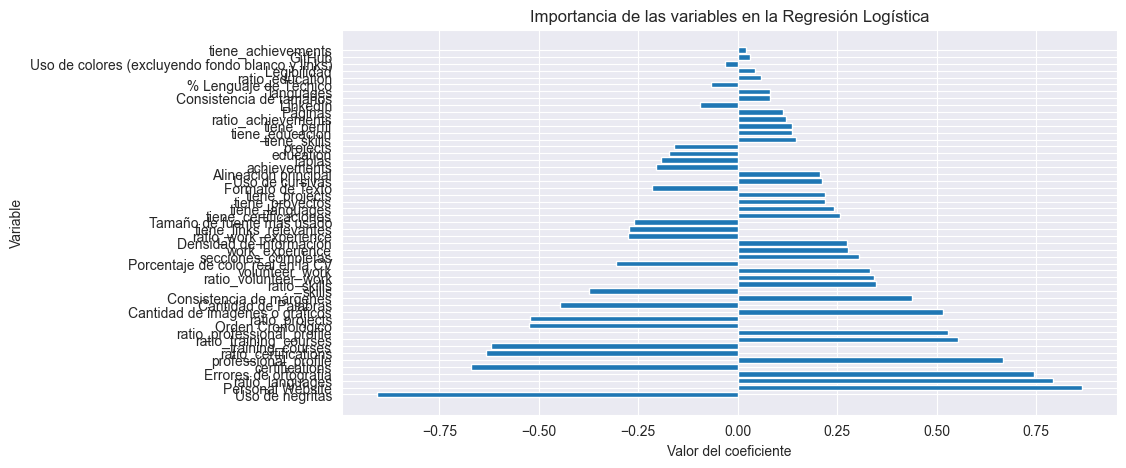

In [186]:
plt.figure(figsize=(10, 5))
plt.barh(coef["Variable"], coef["Coeficiente"])
plt.xlabel("Valor del coeficiente")
plt.ylabel("Variable")
plt.title("Importancia de las variables en la Regresión Logística")
plt.show()

### Usar Recursive feature elimination

In [187]:
selector = RFE(model, n_features_to_select=12)  # Cambia 5 según el número de variables que quieras conservar
selector.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(random_state=69420), n_features_to_select=12)

In [188]:
selected_features = X_train.columns[selector.support_]
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['professional_profile', 'certifications', 'training_courses',
       'Personal Website', 'Errores de ortografia', 'Uso de negritas',
       'Cantidad de imágenes o gráficos', 'ratio_professional_profile',
       'ratio_certifications', 'ratio_languages', 'ratio_training_courses',
       'secciones_completas'],
      dtype='object')


In [189]:
columns_to_keep = ['professional_profile', 'certifications', 'training_courses',
       'Personal Website', 'Errores de ortografia', 'Uso de negritas',
       'Cantidad de imágenes o gráficos', 'ratio_professional_profile',
       'ratio_certifications', 'ratio_languages', 'ratio_training_courses',
       'secciones_completas', 'Passed']

df_keepRL = df[columns_to_keep]

In [190]:
X_rl = df_keepRL.drop(columns=["Passed"])  # Eliminar la variable objetivo
y_rl = df_keepRL["Passed"]  # Variable objetivo

In [191]:
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_rl, y_rl, test_size=0.2, random_state=42, stratify=y)

# Revisar la nueva estructura de los datos
print("Forma de x_train:", X_train_rl.shape)
print("Forma de x_test:", X_test_rl.shape)
print("Forma de y_train:", y_train_rl.shape)
print("Forma de y:", y_test_rl.shape)

Forma de x_train: (497, 12)
Forma de x_test: (125, 12)
Forma de y_train: (497,)
Forma de y: (125,)


In [192]:
resultados_rl_keep = {
    "Regresión Logística": train_logistic_regression(X_train_rl, y_train_rl, X_test_rl, y_test_rl)
}

In [193]:
resultados_rl_keep

{'Regresión Logística': {'Accuracy': 0.624,
  'Precision': 0.65,
  'Recall': 0.24528301886792453,
  'F1-Score': 0.3561643835616438,
  'ROC': np.float64(0.5740303983228512)}}

## Exportar .PKL para paso a producción e implementación

Después de varios intentos, este es el modelo que presenta mejores resultados, por lo que es el que por ahora pasamos a produccción

In [194]:
# import pickle
#
# modelo = LogisticRegression(max_iter=100000, solver='saga', random_state=69)
# modelo.fit(X_train_rl, y_train_rl)
# #Guardar el modelo
# with open('modelo_regresion_logistica.pkl', 'wb') as archivo:
#     pickle.dump(modelo, archivo)

### Intentamos la regresión logística con las variables que mostraron ser relevantes en el análisis vibariado

In [195]:
df_keep = pd.read_csv("../Bases/base_cvs/baseCVsIngVar_keep.csv")

df_keep = df_keep.drop(columns=["Unnamed: 0"], errors="ignore")

In [196]:
df_keep

,secciones_completas,Errores de ortografia,Personal Website,Consistencia de márgenes,Densidad de Información,ratio_education,ratio_training_courses,Cantidad de Palabras,ratio_professional_profile,professional_profile,Uso de negritas,Passed
0,7,56,0,0,18.20,0.056795,0.097363,493,0.079108,39,96,1
1,8,123,0,1,20.20,0.220430,0.232378,1674,0.182796,306,52,1
2,6,82,0,0,18.91,0.144330,0.059278,388,0.067010,26,0,1
3,6,34,0,0,23.60,0.037037,0.000000,378,0.187831,71,53,1
4,6,94,0,1,12.22,0.113669,0.176978,695,0.100719,70,111,1
...,...,...,...,...,...,...,...,...,...,...,...,...
617,8,94,1,1,13.51,0.036258,0.266135,1379,0.021755,30,342,0
618,8,247,0,1,22.50,0.088227,0.074819,3729,0.033789,126,147,0
619,8,72,0,1,17.79,0.020492,0.036885,732,0.016393,12,200,0
620,6,20,0,0,13.04,0.118919,0.075676,185,0.108108,20,0,0


In [197]:
X = df_keep.drop(columns=["Passed"])
y = df_keep["Passed"]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69420, stratify=y)

In [199]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=100000, solver='saga', random_state=69420)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC": roc_auc_score(y_test, y_pred)
    }

resultados_rl = {
    "Regresión Logística": train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test),
}

In [201]:
resultados_rl

{'Regresión Logística': {'Accuracy': 0.5080213903743316,
  'Precision': 0.35,
  'Recall': 0.175,
  'F1-Score': 0.23333333333333334,
  'ROC': np.float64(0.4660046728971962)}}

---

### Maquina de soporte vectorial

In [202]:
def train_svm(X_train, y_train, X_test, y_test):
    model = SVC(kernel="linear")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC": roc_auc_score(y_test, y_pred)
    }

resultados_msv = {
    "Maquina de soporte vectorial": train_svm(X_train, y_train, X_test, y_test),
}

In [203]:
resultados_msv

{'Maquina de soporte vectorial': {'Accuracy': 0.5026737967914439,
  'Precision': 0.34146341463414637,
  'Recall': 0.175,
  'F1-Score': 0.23140495867768596,
  'ROC': np.float64(0.46133177570093464)}}

### Random forest

In [204]:
def train_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=50, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

resultados_rf = {
    "Random Forest": train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test),
}

In [205]:
resultados_rf

{'Random Forest': {'Accuracy': 0.5080213903743316,
  'Precision': 0.35,
  'Recall': 0.175,
  'F1-Score': 0.23333333333333334,
  'ROC': np.float64(0.4660046728971962)}}

### XGBoost

In [206]:
# Función para entrenar y evaluar XGBoost
def train_xgboost(X_train, y_train, X_test, y_test):
    model = XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

resultados_xgb = {
    "Random Forest": train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test),
}

In [207]:
resultados_xgb

{'Random Forest': {'Accuracy': 0.5080213903743316,
  'Precision': 0.35,
  'Recall': 0.175,
  'F1-Score': 0.23333333333333334,
  'ROC': np.float64(0.4660046728971962)}}